<a href="https://colab.research.google.com/github/xwillis/Tensorflow_Tutorial/blob/main/tf_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [219]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [220]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the sample data from integers to floating-point numbers:

In [221]:
mnist = tf.keras.datasets.mnist
#(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Build a machine learning model

Build a `tf.keras.Sequential` model by stacking layers.

In [222]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [223]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.2907138 ,  0.04907277, -0.4041107 , -0.5161883 ,  0.07236829,
         0.77170247, -0.12641647, -0.261303  ,  1.0947715 , -0.06229282]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class: 

In [224]:
tf.nn.softmax(predictions).numpy()

array([[0.10724845, 0.08422628, 0.05353436, 0.04785837, 0.08621141,
        0.17349291, 0.07066976, 0.0617523 , 0.2396563 , 0.07534982]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output. 

Define a loss function for training using `losses.SparseCategoricalCrossentropy`, which takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [225]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [226]:
loss_fn(y_train[:1], predictions).numpy()

1.7516184

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [227]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss: 

In [228]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2981 - accuracy: 0.9134
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1445 - accuracy: 0.9572
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1076 - accuracy: 0.9678
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0873 - accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0738 - accuracy: 0.9765


The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [229]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0787 - accuracy: 0.9754 - 569ms/epoch - 2ms/step


[0.07873014360666275, 0.9753999710083008]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [230]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [231]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[5.0155138e-09, 1.6773251e-10, 5.5931114e-06, 4.4074381e-04,
        5.8702162e-14, 6.8596492e-08, 5.9085181e-15, 9.9954730e-01,
        9.7402301e-07, 5.1813636e-06],
       [4.1619042e-11, 2.9629600e-06, 9.9999678e-01, 6.6620267e-08,
        1.1498224e-14, 2.6496778e-08, 3.7356004e-10, 1.3309292e-16,
        6.6439569e-08, 1.9377781e-14],
       [1.7553297e-06, 9.9871099e-01, 1.2459920e-04, 1.7113765e-05,
        3.7038779e-05, 9.1171196e-06, 2.1087402e-05, 8.7792735e-04,
        1.9947044e-04, 8.2419223e-07],
       [9.9993825e-01, 2.9650446e-08, 2.9152912e-05, 4.9618706e-08,
        5.1370225e-08, 7.3796832e-06, 1.0610623e-05, 3.2817991e-06,
        2.3439658e-07, 1.0913593e-05],
       [1.7865197e-05, 9.0893870e-10, 1.4053854e-05, 4.2432811e-07,
        9.9439597e-01, 4.4820313e-06, 1.6505550e-05, 2.5614677e-04,
        3.6891818e-06, 5.2907825e-03]], dtype=float32)>

In [232]:
# Conclusion

#Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

#For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).


#Now to test with our custom data

Non-programming (unless...?):
1. write single digits
2. take photos of them
3. crop photos if necessary
4. upload to google drive in Drive>colabs notebooks>(new folder) handwriting

Programming:

1. use code to load in the handwriting folder
2. use code to access the images in the folder
3. test our model
4. print out results
5. print out input image



#Use code to load in the folder with our data
First we will mount our ENTIRE drive (haha why)  
Then we will *change directory* (cd) to where we saved our images  
Then we will *list* (ls) the files in that directory to make sure we are in the right place.

In [233]:
from google.colab import drive
drive.mount('/content/drive')
#let's check that our files are where and named what we think they are
%cd '/content/drive/MyDrive/Colab Notebooks/handwriting' 
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/handwriting
img_1.JPG  img_2.JPG  img_5.JPG  img_6.JPG  img_7.JPG  img_8.JPG


#loading in and cleaning up our input
because tf likes very, very stark lines

1. let's figure out what our range really is
2. convert to binary

In [234]:
from PIL import Image

# Import an image from directory:
input_image = Image.open('/content/drive/MyDrive/Colab Notebooks/handwriting/img_8.JPG', 'r') 
# if we are writing in black ink then you can remove other colors .convert('CMYK')

#resize image to 28pixels x 28
newsize = (28, 28)
input_image = input_image.resize(newsize)
# Extracting the width and height
# of the image:
width, height = input_image.size

# Extracting pixel map:
pixel_map= [([None] * width) for x in range(height)]

# taking half of the width:
for i in range(width):
	for j in range(height):
		
		# getting the RGB pixel value.
		r, g, b = input_image.getpixel((i, j))
		
		# Apply formula of grayscale:
		grayscale = (0.299*r + 0.587*g + 0.114*b)

		# setting the pixel value.
		pixel_map[j][i] = int(grayscale) #(int(grayscale), int(grayscale), int(grayscale))

# Saving the final output
# as "grayscale.png":
#input_image.save("grayscale", format="png")

# use input_image.show() to see the image on the
# output screen.


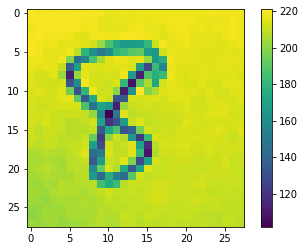

In [235]:
#literally copied this off the web
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
plt.figure(1)

plt.imshow(pixel_map)
plt.colorbar()
plt.grid(False)
plt.show()

running our first filter to remove all the noise

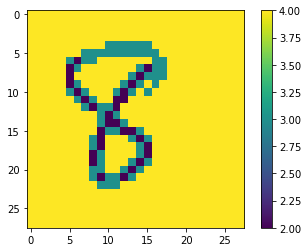

In [236]:
filtered_pixel_map= [([None] * width) for x in range(height)]
for i in range(width):
	for j in range(height):
		
		# getting the RGB pixel value.
		#r, g, b = input_image.getpixel((i, j))
		
		# Apply formula of grayscale:
		#grayscale = (0.299*r + 0.587*g + 0.114*b)

		# setting the pixel value.
		value_to_change1 = 50.0

		filtered_pixel_map[j][i] = int(pixel_map[j][i]/value_to_change1)
#pixel_map = pixel_map/255.0
plt.figure(2)

plt.imshow(filtered_pixel_map)
plt.colorbar()
plt.grid(False)
plt.show()

Now to turn it into binary!

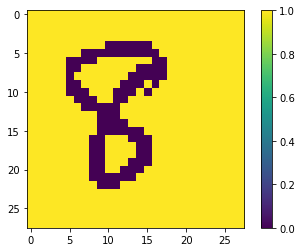

In [237]:
filtered_pixel_map2= [([None] * width) for x in range(height)]
for i in range(width):
	for j in range(height):
		
		# getting the RGB pixel value.
		#r, g, b = input_image.getpixel((i, j))
		
		# Apply formula of grayscale:
		#grayscale = (0.299*r + 0.587*g + 0.114*b)

		# setting the pixel value.
		value_to_change2 = 4.0
		
		filtered_pixel_map2[j][i] = int(filtered_pixel_map[j][i]/value_to_change2)
#pixel_map = pixel_map/255.0
plt.figure(2)

plt.imshow(filtered_pixel_map2)
plt.colorbar()
plt.grid(False)
plt.show()

#Testing our model with our custom images

In [238]:
filtered_pixel_map2 = (np.expand_dims(filtered_pixel_map2,0))

#print(img.shape)
predictions_single = probability_model.predict(filtered_pixel_map2)

print(predictions_single)

[[2.5873556e-19 1.0142079e-29 1.9021927e-05 9.5714194e-01 0.0000000e+00
  1.5148908e-03 6.7395381e-20 4.1324109e-02 4.6090489e-11 9.6147549e-22]]


#Printing out the results

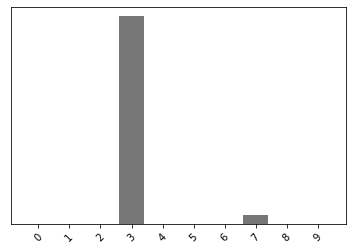

[[2.5873556e-19 1.0142079e-29 1.9021927e-05 9.5714194e-01 0.0000000e+00
  1.5148908e-03 6.7395381e-20 4.1324109e-02 4.6090489e-11 9.6147549e-22]]


3

In [239]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

plot_value_array(1, predictions_single, y_test)
class_names = ("0", "1", "2", "3", "4", "5", "6", "7", "8", "9")
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()
print(predictions_single)
np.argmax(predictions_single)

#repeat for othe input images
Exercise is left to the reader  
But the results should be as below:
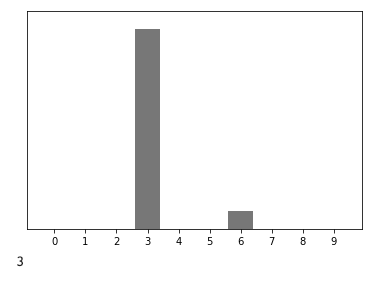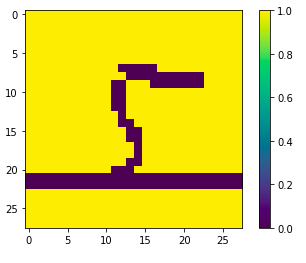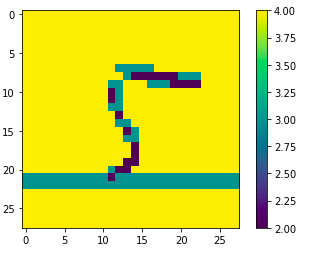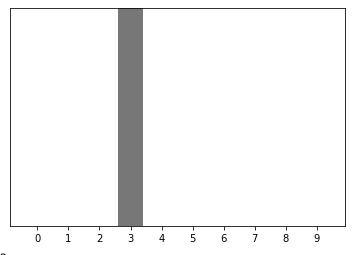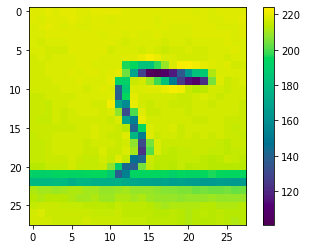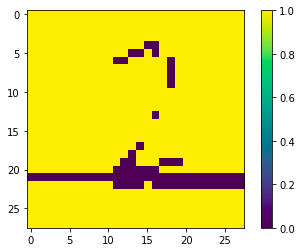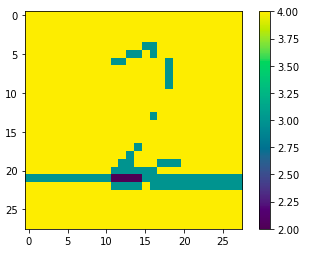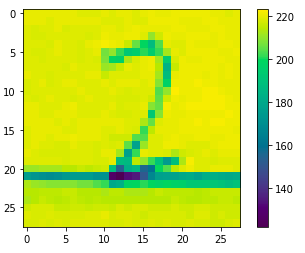

#conclusion
As a side note, it's hard to tell if either the model thinks that everything is a 3, if the image processing is not good enough, or if i legit write everything like a 3.